In [1]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the four datasets
# amazon = pd.read_csv("arima_datasets/amazon_close.csv")
# co2 = pd.read_csv("arima_datasets/co2.csv")
# earthquakes = pd.read_csv("arima_datasets/earthquakes.csv")
# milk = pd.read_csv("arima_datasets/milk_production.csv")

In [2]:
candy = pd.read_csv("arima_datasets/candy_production.csv",
                   index_col='date', parse_dates=True)

# Exploration the data

## Pay attetion to which axis the different time series are plotted on.

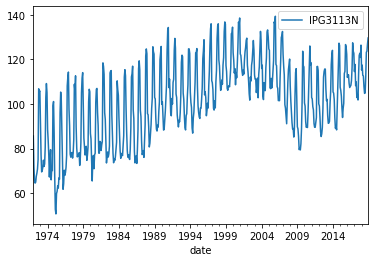

In [3]:
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

In [4]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 564 entries, 1972-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   IPG3113N  564 non-null    float64
dtypes: float64(1)
memory usage: 8.8 KB


In [5]:
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


In [6]:
candy.index

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='date', length=564, freq=None)

# Train-test splits

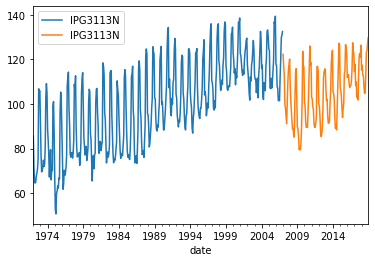

In [7]:
candy_train = candy.loc[:"2006"]
candy_test = candy.loc["2007":]

fig, ax = plt.subplots()

candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

# Augemented Dicky-Fuller

In [8]:
earthquakes = pd.read_csv("arima_datasets/earthquakes.csv")

earthquakes.head()

,date,Year,earthquakes_per_year
0,1900-01-01,1900,13.0
1,1901-01-01,1901,14.0
2,1902-01-01,1902,8.0
3,1903-01-01,1903,10.0
4,1904-01-01,1904,16.0


<AxesSubplot:>

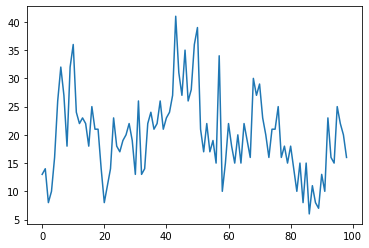

In [9]:
earthquakes['earthquakes_per_year'].plot()

In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(earthquakes['earthquakes_per_year'])

print(result[0])
print(result[1])
print(result[4])
# 第五个是配合第一个一起看的，是在99%，95%，90%置信区间下的临界的ADF检验的值。如果第一个值比第五个值小证明平稳，反之证明不平稳。

-3.183192251191782
0.02097842525600371
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


# Taking the difference 

## other classic tranformation: log-return 
## log_return(y_t) = log(y_t/y_t-1)
## y_t = amazon. y_t-1 = amazon.shift(1), log = np.log()

In [11]:
amazon = pd.read_csv("arima_datasets/amazon_close.csv")

amazon.head()

,date,close
0,2019-02-08,1588.22
1,2019-02-07,1614.37
2,2019-02-06,1640.26
3,2019-02-05,1658.81
4,2019-02-04,1633.31


In [12]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   close   1259 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


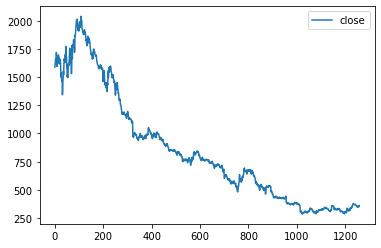

ADF statistic: -1.3446690965326118
p-value: 0.6084966311408349


In [13]:
result = adfuller(amazon.close)

fig, ax = plt.subplots()
amazon.plot(ax=ax)
plt.show()

print('ADF statistic:', result[0])
print('p-value:', result[1])

In [14]:
log_return = np.log(amazon.close/amazon.close.shift(1))
log_return

0            NaN
1       0.016331
2       0.015910
3       0.011246
4      -0.015492
          ...   
1254    0.010408
1255   -0.000420
1256   -0.022508
1257    0.035276
1258   -0.002546
Name: close, Length: 1259, dtype: float64

In [15]:
result_log = adfuller(log_return.dropna())
result_log

(-34.91574853605969,
 0.0,
 0,
 1257,
 {'1%': -3.4355629707955395,
  '5%': -2.863842063387667,
  '10%': -2.567995644141416},
 -6245.723147672197)

In [16]:
amazon_diff = amazon['close'].diff().dropna()
amazon_diff

1       26.15
2       25.89
3       18.55
4      -25.50
5       -7.08
        ...  
1254     3.70
1255    -0.15
1256    -7.95
1257    12.54
1258    -0.92
Name: close, Length: 1258, dtype: float64

result_diff = adfuller(amazon_diff)
print(result_diff)

# Generating ARMA data

## generate 100 days worth of AR/MA/ARMA data
## use function: arma_generate_sample()
## ARMA(p,q):
## ar_coefs[1, -a_1, -a_2,..., -a_p]
## ma_coefs[1, m_1, m_2, ..., m_q]

## >>> import numpy as np
## >>> np.random.seed(12345)
## >>> arparams = np.array([.75, -.25])
## >>> maparams = np.array([.65, .35])
## >>> ar = np.r_[1, -arparams] # add zero-lag and negate
## >>> ma = np.r_[1, maparams] # add zero-lag
## >>> y = sm.tsa.arma_generate_sample(ar, ma, 250)
## >>> model = sm.tsa.ARIMA(y, (2, 0, 2), trend='n').fit(disp=0)
## >>> model.params
## array([ 0.79044189, -0.23140636,  0.70072904,  0.40608028])

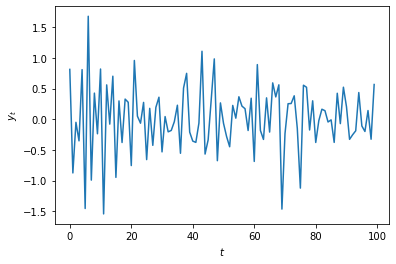

In [17]:
from statsmodels.tsa.arima_process import arma_generate_sample

np.random.seed(1)

ar_coefs=[1]
ma_coefs=[1,-0.7]

y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel('$y_t$')
plt.xlabel('$t$')
plt.show()

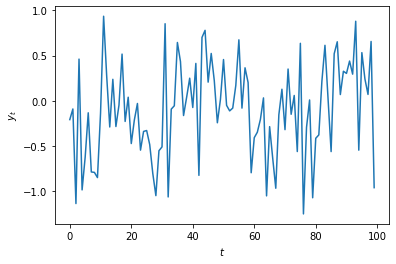

In [18]:
np.random.seed(2)

ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel('$y_t$')
plt.xlabel('$t$')
plt.show()

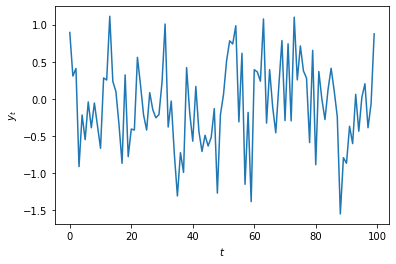

In [19]:
np.random.seed(3)

# y_t = -0.2*y_t-1 + 0.3*e_t-1 + 0.4*e_t-2 + e_t
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel('$y_t$')
plt.xlabel('$t$')
plt.show()

# Fitting 

In [20]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y, order=(1,0,1))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -85.231
Date:                Mon, 28 Nov 2022   AIC                            178.463
Time:                        11:04:31   BIC                            188.883
Sample:                             0   HQIC                           182.680
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0711      0.085     -0.838      0.402      -0.237       0.095
ar.L1          0.5889      0.336      1.752      0.080      -0.070       1.248
ma.L1         -0.3840      0.391     -0.982      0.3

# Fitting an ARMAX model

In [21]:
# no such dataset 
# # Instantiate the model
# model = ARIMA(hospital['wait_times_hrs'], 
#               order=(2,0,1), 
#               exog=hospital['nurse_count'])
# # 'wait_times_hrs' may be related to an exogenous variable 'nurse_count' which is the number of nurses on shift at any given time.

# # Fit the model
# results = model.fit()

# # Print model fit summary
# print(results.summary())

In [22]:
milk = pd.read_csv("arima_datasets/milk_production.csv")

milk.head()

,date,pounds_per_cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [23]:
co2 = pd.read_csv("arima_datasets/co2.csv")

co2.head()

,date,CO2_ppm
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,317.10
4,1958-07-01,315.86


# Forecasting 

## Generating one-step-ahead predictions

In [24]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   close   1259 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [25]:
model = ARIMA(earthquakes['earthquakes_per_year'], order=(3,0,1))
results = model.fit()

In [26]:
# make one-step-ahead predictions over the latest 30 days of data
one_step_forecast = results.get_prediction(start=-30)

mean_forecast = one_step_forecast.predicted_mean

confidence_intervals = one_step_forecast.conf_int()

lower_limits = confidence_intervals.loc[:,['lower earthquakes_per_year']]
upper_limits = confidence_intervals.loc[:,['upper earthquakes_per_year']]

In [27]:
# confidence_intervals

In [28]:
# mean_forecast

In [29]:
# earthquakes.tail(30)

## Plotting one-step-ahead predictions

In [30]:
type(lower_limits)

pandas.core.frame.DataFrame

In [31]:
upper_limits.head()

,upper earthquakes_per_year
69,34.925429
70,34.475342
71,37.263585
72,34.893595
73,33.416891


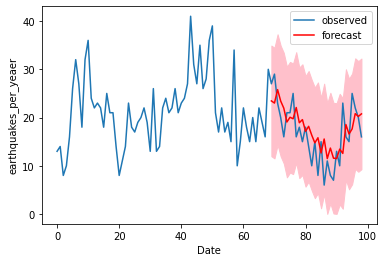

In [32]:
plt.plot(earthquakes.index, earthquakes.earthquakes_per_year,label='observed')

plt.plot(mean_forecast.index, mean_forecast, label='forecast', color='r')

plt.fill_between(lower_limits.index, lower_limits['lower earthquakes_per_year'], 
                 upper_limits['upper earthquakes_per_year'], color='pink')

plt.xlabel('Date')
plt.ylabel('earthquakes_per_yeaer')
plt.legend()
plt.show()

## Generating dynamic forecast

In [33]:
dynamic_forecast = results.get_prediction(start=-30, dynamic=True)

mean_forecast = dynamic_forecast.predicted_mean

confidence_intervals = dynamic_forecast.conf_int()

lower_limits = confidence_intervals.loc[:,'lower earthquakes_per_year']
upper_limits = confidence_intervals.loc[:,'upper earthquakes_per_year']

In [34]:
mean_forecast.head()

69    23.452855
70    21.557681
71    22.421452
72    21.880217
73    21.300417
Name: predicted_mean, dtype: float64

In [35]:
lower_limits.shape

(30,)

## Plotting dynamic forecasts

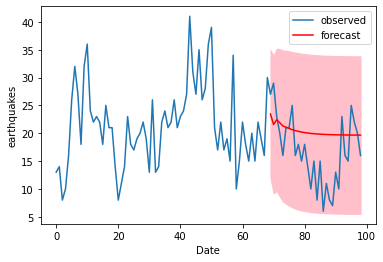

In [36]:
plt.plot(earthquakes.index, earthquakes['earthquakes_per_year'], label='observed')

plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

plt.xlabel('Date')
plt.ylabel('earthquakes')
plt.legend()
plt.show()

# ARIMA

## get_prediction vs get_forecast

### get_prediction is the most general and has extras like confidence or prediction intervals, and can be used in- and out-of-sample

### get_forecast is a special case of get_prediction restricted to out-of-sample prediction starting at the end of the sample period.

In [37]:
# differencing and fitting arma

amazon_diff = amazon['close'].diff().dropna()

arma = ARIMA(amazon_diff, order=(2,0,2))

arma_results = arma.fit()

print(arma_results.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -5532.371
Date:                Mon, 28 Nov 2022   AIC                          11076.743
Time:                        11:04:32   BIC                          11107.566
Sample:                             0   HQIC                         11088.327
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9873      0.459     -2.151      0.031      -1.887      -0.088
ar.L1         -0.1542      0.078     -1.988      0.047      -0.306      -0.002
ar.L2          0.7944      0.080      9.960      0.0

In [38]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
# arma_diff_forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
# arma_int_forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,1]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [39]:
arma_value_forecast

1258    358.768019
1259    358.147337
1260    356.218012
1261    355.667190
1262    353.864253
1263    353.349441
1264    351.641354
1265    351.140525
1266    349.505631
1267    349.004626
Name: predicted_mean, dtype: float64

## Fitting an ARIMA model

In [40]:
arima = ARIMA(amazon['close'], order=(2,1,2))

arima_results = arima.fit()

arima_value_forcast = arima_results.get_forecast(steps=10).predicted_mean

In [41]:
arima_value_forcast

1259    359.999504
1260    360.588036
1261    359.811473
1262    360.403607
1263    359.698947
1264    360.281120
1265    359.633754
1266    360.198081
1267    359.598124
1268    360.140267
Name: predicted_mean, dtype: float64

# ACF and PACF

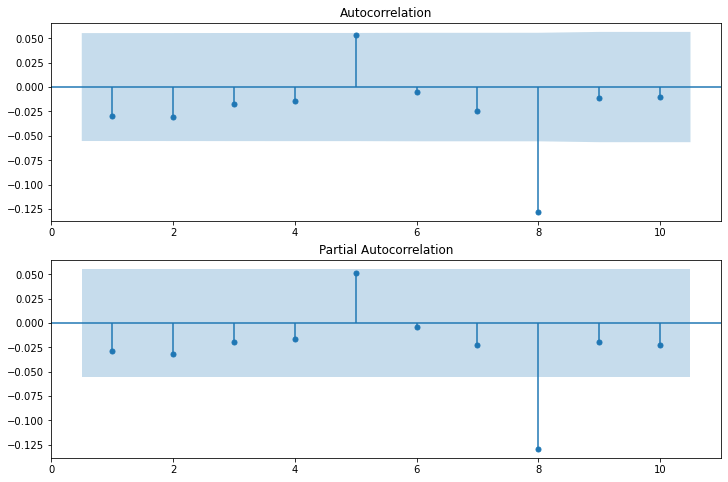

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
plot_acf(amazon_diff, lags=10, zero=False, ax=ax1)
plot_pacf(amazon_diff, lags=10, zero=False, ax=ax2)

plt.show()

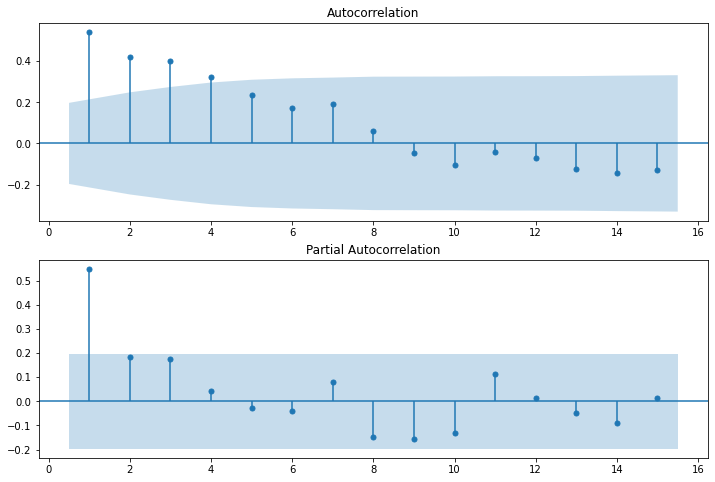

In [43]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF and PACF
plot_acf(earthquakes.earthquakes_per_year, lags=15, zero=False, ax=ax1)
plot_pacf(earthquakes.earthquakes_per_year, lags=15, zero=False, ax=ax2)

# Show plot
plt.show()

In [44]:
model = ARIMA(earthquakes.earthquakes_per_year, order=(1,0,0))

results = model.fit()

# AIC and BIC

## Searching over model order

In [45]:
order_aic_bic = []

for p in range(3):
    for q in range(3):
        model = ARIMA(earthquakes['earthquakes_per_year'], order=(p,0,q))
        results = model.fit()
        
        order_aic_bic.append((p,q,results.aic,results.bic))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Choosing order with AIC and BIC

## AIC smaller better prediction

In [46]:
order_earthquakes = pd.DataFrame(order_aic_bic, columns=['p','q','AIC','BIC'])

In [47]:
order_earthquakes.sort_values('AIC')

,p,q,AIC,BIC
4,1,1,640.456284,650.836763
5,1,2,642.380867,655.356467
8,2,2,642.468590,658.039309
6,2,0,642.733854,653.114333
3,1,0,643.967677,651.753037
7,2,1,647.440664,660.416264
2,0,2,651.733227,662.113706
1,0,1,654.846859,662.632218
0,0,0,676.544359,681.734599


In [48]:
order_earthquakes.sort_values('BIC')

,p,q,AIC,BIC
4,1,1,640.456284,650.836763
3,1,0,643.967677,651.753037
6,2,0,642.733854,653.114333
5,1,2,642.380867,655.356467
8,2,2,642.468590,658.039309
7,2,1,647.440664,660.416264
2,0,2,651.733227,662.113706
1,0,1,654.846859,662.632218
0,0,0,676.544359,681.734599


## Model diagnostics

### mean absolute error: mean difference between predictions and the true values.

In [49]:
results.resid

0    -6.643332
1    -1.987492
2    -7.937992
3    -3.044327
4     2.543393
        ...   
94   -1.708540
95    7.636368
96    1.533773
97   -0.757554
98   -4.304773
Length: 99, dtype: float64

In [50]:
mae = np.mean(abs(results.resid))
mae

4.449310767070859

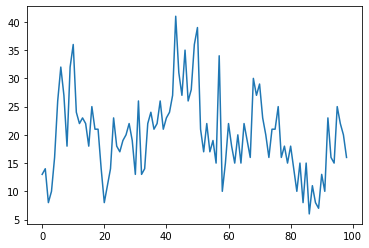

In [51]:
earthquakes.earthquakes_per_year.plot()
plt.show()

### Diagnostic summary siatistics

#### Test Ljung-Box -> Prob(Q) -> There are no correlations in the residual
#### Test Jarque-Bear -> Prob(JB) -> The residuals are nornally distributed.

In [52]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(2, 0, 2)   Log Likelihood                -315.234
Date:                  Mon, 28 Nov 2022   AIC                            642.469
Time:                          11:04:34   BIC                            658.039
Sample:                               0   HQIC                           648.769
                                   - 99                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6433      2.213      8.875      0.000      15.305      23.981
ar.L1         -0.0113      0.245     -0.046      0.963      -0.492       0.470
ar.L2          0.7169      0.168      4.267      0.000       0.388       1.046
ma.L1          0.4522      0.270      1.673      0.094      -0.078       0.982
ma.L2         -0.4443      0.163     -2.734      0.006      -0.763      -0.126
sigma2        33.9226      4.835      7.017      0.000      24.447      43.398
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 4.87
Prob(Q):                              0.87   Prob(JB):                         0.09
Heteroskedasticity (H):               0.65   Skew:                             0.48
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Plot diagnostics

#### Standardized residual -> There are no obvious patterns in the residuals
#### Histogram plus kde estimate -> The KDE curve should be very similar to the normal distribution

#### Normal Q-Q -> Most of the data points should lie on the straight line

#### Correlogram -> 95% of correlations for lag greater than zero should not be significant


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


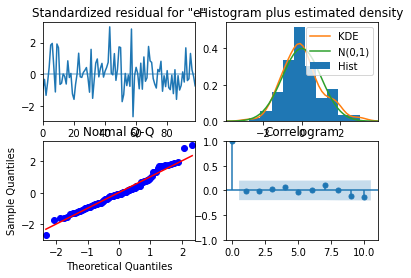

In [53]:
results.plot_diagnostics()
plt.show()

### Box-Jenkins methodology

#### https://machinelearningmastery.com/gentle-introduction-box-jenkins-method-time-series-forecasting/

#### https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

#### Identification : adfuller -> acf/pacf -> ARIMA() -> plot_diagnostics()

# SARIMA

<AxesSubplot:>

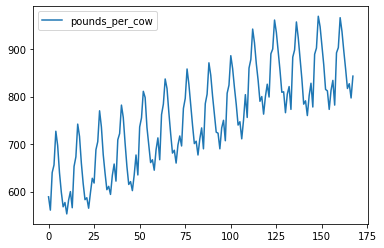

In [54]:
milk.plot()

In [55]:
milk.head(2)

,date,pounds_per_cow
0,1962-01-01,589.0
1,1962-02-01,561.0


## seasonal decompose

In [71]:
# !pip uninstall statsmodels -y
# !pip install --user statsmodels --upgrade

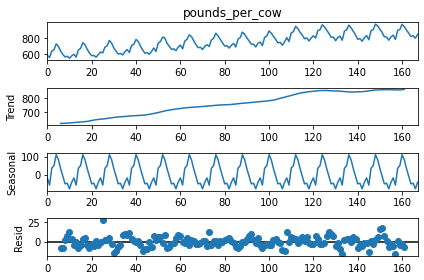

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(milk.pounds_per_cow, period=12)
decomp.plot()
plt.show()

In [82]:
adfuller(milk.pounds_per_cow)

(-1.3038115874221263,
 0.6274267086030331,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

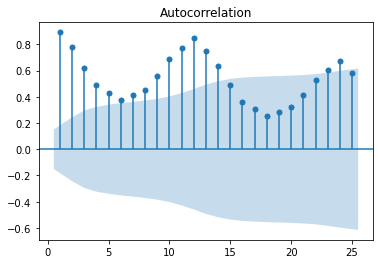

In [83]:
fig, ax1 = plt.subplots()

plot_acf(milk.pounds_per_cow, lags=25, zero=False, ax=ax1)
plt.show()

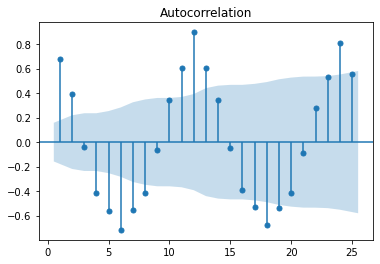

In [88]:
# .rolling(n).mean() -> calculate rolling mean
# rolling window size > period
milk_2 = milk.pounds_per_cow - \
                milk.pounds_per_cow.rolling(15).mean()
    
milk_2 = milk_2.dropna()

fig, ax1 = plt.subplots()

plot_acf(milk_2, lags=25, zero=False, ax=ax1)
plt.show()

## Fitting SARIMA models

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [89]:
# Create a SARIMA model
model = SARIMAX(milk.pounds_per_cow, order=(1,0,0), seasonal_order=(1,1,0,12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                     pounds_per_cow   No. Observations:                  168
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -545.842
Date:                            Mon, 28 Nov 2022   AIC                           1097.683
Time:                                    14:08:43   BIC                           1106.833
Sample:                                         0   HQIC                          1101.400
                                            - 168                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9698      0.022     44.660      0.000       0.927       1.012
ar.S.L12      -0.4274      0.051   

## Choosing SARIMA order

### Note that you can take multiple differences of a DataFrame using df.diff(n1).diff(n2).

In [90]:
# Take the first and seasonal differences and drop NaNs
milk_diff = milk.pounds_per_cow.diff().diff(12).dropna()

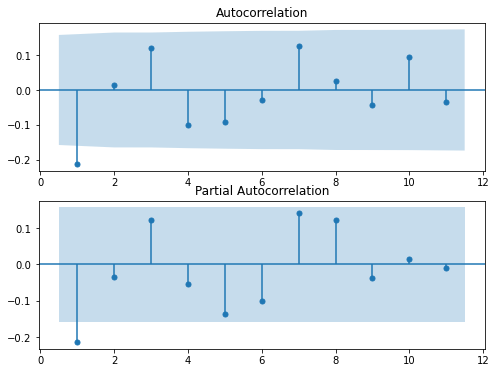

In [91]:
# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(milk_diff, lags=11, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(milk_diff, lags=11, zero=False, ax=ax2)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  # http://www-stat.wharton.upenn.edu/~steele/Courses/956/ResourceDetails/YuleWalkerAndMore.htm


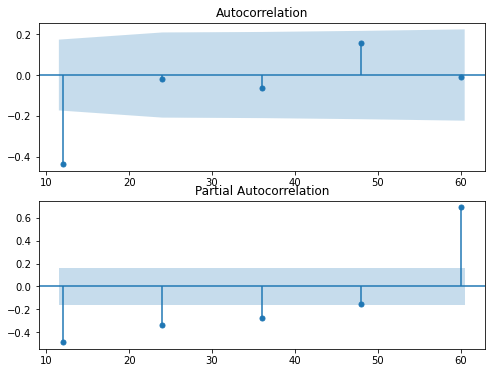

In [92]:
# Make list of lags
lags = [12, 24, 36, 48, 60]

# Create the figure 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))

# Plot the ACF on ax1
plot_acf(milk_diff, lags=lags, zero=False, ax=ax1)

# Plot the PACF on ax2
plot_pacf(milk_diff, lags=lags, zero=False, ax=ax2)

plt.show()

## SARIMA vs ARIMA

In [ ]:
# # Create ARIMA mean forecast
# arima_pred = arima_results.get_forecast(25)
# arima_mean = arima_pred.predicted_mean

# # Create SARIMA mean forecast
# sarima_pred = sarima_results.get_forecast(25)
# sarima_mean = sarima_pred.predicted_mean

# # Plot mean ARIMA and SARIMA predictions and observed
# plt.plot(dates, sarima_mean, label='SARIMA')
# plt.plot(dates, arima_mean, label='ARIMA')
# plt.plot(wisconsin_test, label='observed')
# plt.legend()
# plt.show()

## Automation and save

In [95]:
!pip install pmdarima

     -------------------------------------- 572.0/572.0 kB 3.3 MB/s eta 0:00:00


In [99]:
# Import pmdarima as pm
import pmdarima as pm 

# Create auto_arima model
model1 = pm.auto_arima(milk.pounds_per_cow,
                      seasonal=True, m=12,
                      d=0, D=1, 
                      max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

# Print model summary
print(model1.summary())

ImportError: cannot import name '__version__' from 'statsmodels._version' (C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\_version.py)

## save and load

In [ ]:
# Import joblib
import joblib

# Set model name
filename = 'candy_model.pkl'

# Pickle it
joblib.dump(model,filename)

# Load the model back in
loaded_model = joblib.load(filename)

# Update the model
loaded_model.update(df_new)

In [ ]:
# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX 

# Create model object
model = SARIMAX(co2, 
                order=(1,1,1), 
                seasonal_order=(0,1,1,12), 
)
# Fit model
results = model.fit()

# Plot common diagnostics
results.plot_diagnostics()
plt.show()

In [ ]:
# Create forecast object
forecast_object = results.get_forecast(136)

# Extract predicted mean attribute
mean = forecast_object.predicted_mean

# Calculate the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

In [ ]:
plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int['lower CO2_ppm'], conf_int['upper CO2_ppm'], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [ ]:
# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])